In [451]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

import seaborn as sns
import os
import sys
from chimera import Chimera

sns.set(style='ticks', context='notebook', font_scale=1.2)

In [452]:
def gradient_patch(ax, xmin, xmax, ymin, ymax, fill_color='k', alpha=1, zorder=1):
    
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    
    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Rectangle(xy=(xmin, ymin), width=xmax-xmin, height=ymax-ymin, 
                          facecolor='none', edgecolor='none')
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

In [453]:
# load experimental data
data = pd.read_csv('20220101.csv')
data.loc[:, 'WL_TFD'] = np.abs(data.loc[:, 'wl'] - 720)  # target is 540 +/- 2
data.loc[:, 'AREA_TFD'] = np.abs(data.loc[:, 'Area_ratio']-7)
data

,#,gold,silver,CTAB,I-2959,v5,height,time,cycle,Area_ratio,num_peak,wl,FWHM,inten_ratio,Unnamed: 14,WL_TFD,AREA_TFD
0,1,14.6,15.0,22.6,24.9,0,8.9,11.4,39,3.1590,2,769.0,225.7300,0.93352,"[[0.0037750000000000006, 1.5, 5.22874999999999...",49.0,3.8410
1,2,11.7,5.2,40.3,10.1,0,11.3,14.9,38,0.0000,0,0.0,800.0000,0.00000,"[0, 0, 0, 0, 0]",720.0,7.0000
2,3,13.8,13.6,22.4,20.5,0,8.0,12.4,39,4.6200,2,802.0,215.1894,1.42202,"[[0.01456, 14.0, 16.849499999999978, 75.449715...",82.0,2.3800
3,4,5.0,7.5,33.9,14.8,0,10.3,15.5,38,0.0000,0,0.0,800.0000,0.00000,"[0, 0, 0, 0, 0]",720.0,7.0000
4,5,14.9,12.6,29.1,23.0,0,8.4,10.1,38,5.2120,2,805.0,196.2720,1.77818,"[[0.001384999999999999, 6.0, 5.04075000000001,...",85.0,1.7880
5,6,8.6,5.9,15.4,14.1,0,9.0,19.8,36,0.0000,0,0.0,800.0000,0.00000,"[0, 0, 0, 0, 0]",720.0,7.0000
6,7,15.0,12.7,26.8,24.2,0,8.6,10.7,38,7.5325,2,848.5,195.5900,2.43477,"[[0.0011199999999999995, 5.0, 8.09574999999999...",128.5,0.5325
7,8,13.1,10.2,27.7,18.1,0,9.7,11.8,40,0.0000,0,0.0,800.0000,0.00000,"[0, 0, 0, 0, 0]",720.0,7.0000
8,9,15.0,11.7,25.1,23.2,0,8.9,10.9,38,3.1925,1,800.0,217.0000,0.00000,"[[0.0013699999999999988, 14.0, 5.6400000000000...",80.0,3.8075
9,10,6.2,6.3,25.8,12.7,0,11.9,17.8,37,0.0000,0,0.0,800.0000,0.00000,"[0, 0, 0, 0, 0]",720.0,7.0000


In [454]:
chimera = Chimera(tolerances=[4, 10, 0.4, 0.0], absolutes=[True, True, False, False], goals=['min', 'min', 'min', 'max'], softness=10e-3)
scalarized = chimera.scalarize(data.loc[:, ['AREA_TFD', 'WL_TFD','FWHM','inten_ratio']])
#scalarized = chimera.scalarize(data.loc[:, ['AREA_TFD', 'NUM_PEAK_TFD', 'WL_TFD','FWHM','inten_ratio']])
data.iloc[np.argmin(scalarized), :]

#                                                             33
gold                                                        14.8
 silver                                                     12.5
CTAB                                                        24.7
I-2959                                                      23.1
v5                                                             0
height                                                       8.8
time                                                        10.6
cycle                                                         38
Area_ratio                                                3.6295
num_peak                                                       2
wl                                                           730
FWHM                                                      219.21
inten_ratio                                              1.12596
Unnamed: 14    [[0.010375000000000002, 0.0, 1.727249999999998...
WL_TFD                   

In [455]:
chimera = Chimera(tolerances=[4, 10, 0.4, 0.0], absolutes=[True, True, False, False], goals=['min', 'min', 'min', 'max'], softness=10e-3)
scalarized = chimera.scalarize(data.loc[:, ['AREA_TFD', 'WL_TFD','FWHM','inten_ratio']])
data.iloc[np.argmin(scalarized), :]

#                                                             33
gold                                                        14.8
 silver                                                     12.5
CTAB                                                        24.7
I-2959                                                      23.1
v5                                                             0
height                                                       8.8
time                                                        10.6
cycle                                                         38
Area_ratio                                                3.6295
num_peak                                                       2
wl                                                           730
FWHM                                                      219.21
inten_ratio                                              1.12596
Unnamed: 14    [[0.010375000000000002, 0.0, 1.727249999999998...
WL_TFD                   

<AxesSubplot:ylabel='Count'>

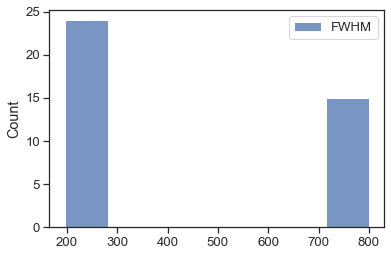

In [456]:
sns.histplot(data.loc[:, ['FWHM']])

<AxesSubplot:ylabel='Count'>

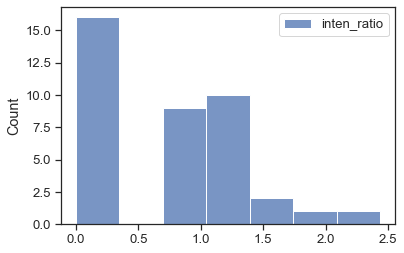

In [457]:
sns.histplot(data.loc[:, ['inten_ratio']])

In [458]:
mask = data.loc[:, 'FWHM'] > 300
data.loc[mask, 'FWHM']

1     800.0
3     800.0
5     800.0
7     800.0
9     800.0
11    800.0
13    800.0
15    800.0
17    800.0
19    800.0
21    800.0
23    800.0
29    800.0
33    800.0
37    800.0
Name: FWHM, dtype: float64

In [468]:
mask = data.loc[:, 'FWHM'] <300
data.loc[mask, 'FWHM']

0     225.7300
2     215.1894
4     196.2720
6     195.5900
8     217.0000
10    199.9600
12    250.0000
14    215.1100
16    238.1600
18    200.6085
20    218.9800
22    211.0500
24    212.2500
25    199.6600
26    235.7900
27    199.2600
28    215.6000
30    225.9400
31    240.5000
32    219.2100
34    224.9700
35    231.9900
36    235.2100
38    260.3200
Name: FWHM, dtype: float64

In [460]:
thres_fwhm = data.loc[:, 'FWHM'].min() + (max_fwhm - min_fwhm) * 0.4
print(thres_fwhm)

223.518


In [ ]:
mask = data.loc[:, 'num_peak'] <300
data.loc[mask, 'FWHM']

## Process data to get relevant info

In [461]:
# define multi-objective preferences
#chimera = Chimera(tolerances=[2, 0.4, 0.0], absolutes=[True, False, False], goals=['min', 'min', 'max'], softness=10e-10)
chimera = Chimera(tolerances=[4, 10, 0.4, 0.0], absolutes=[True, True, False, False], goals=['min', 'min', 'min', 'max'], softness=10e-3)
# Get index of best solution at each experimental iteration
best_indices = []
for i in data.index:
    # consider objectives for experiments up to i
    objectives = data.loc[:i, ['AREA_TFD', 'WL_TFD','FWHM','inten_ratio']]
    # scalarize objectives
    scalarized = chimera.scalarize(objectives)
    # save index of best up to i
    best_idx = np.argmin(scalarized)
    best_indices.append(best_idx)
    
# get history of objectives for best solution
obj_1 = [data.loc[:, 'AREA_TFD'].to_numpy()[i] for i in best_indices]
obj_0 = data.loc[:, 'AREA_TFD'].to_numpy()

obj_2 = [data.loc[:, 'WL_TFD'].to_numpy()[i] for i in best_indices]
obj_4 = [data.loc[:, 'FWHM'].to_numpy()[i] for i in best_indices]
obj_5 = [data.loc[:, 'inten_ratio'].to_numpy()[i] for i in best_indices]

In [462]:
# get dynamic/relative 0.4 threshoold for FWHM
min_fwhm_list = []
max_fwhm_list = []
thr_fwhm_list = []

for i in data.index:
    min_fwhm = data.loc[:i, 'FWHM'].min()
    #max_fwhm = data.loc[:i, 'FWHM'].max()
    
    mask = data.loc[:, 'FWHM'] < 469 # filter out dummy results
    mask[i+1:] = False
    max_fwhm = data.loc[mask, 'FWHM'].max()

    thr_fwhm = min_fwhm + (max_fwhm - min_fwhm) * 0.4
    min_fwhm_list.append(min_fwhm)
    max_fwhm_list.append(max_fwhm)
    thr_fwhm_list.append(thr_fwhm)
    

# get final/last 0.4 threshoold for FWHM
min_fwhm = data.loc[:, 'FWHM'].min()
#max_fwhm = data.loc[:, 'FWHM'].max()
mask = data.loc[:, 'FWHM'] < 469  # filter out dummy results
max_fwhm = data.loc[mask, 'FWHM'].max()

thres_fwhm = data.loc[:, 'FWHM'].min() + (max_fwhm - min_fwhm) * 0.4

## Three 1D plots

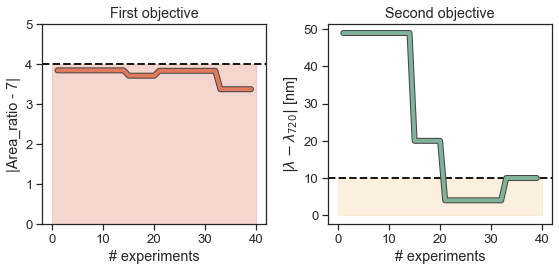

In [478]:
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(12,4))
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

experiment_nums = range(1, len(data)+1, 1)  # for x-axis

# colors
c1 = '#e07a5f'
c2 = '#81b29a'
c3 = '#f2cc8f'

# -----------
# plot traces
# -----------
ax1.plot(experiment_nums, obj_1, color='#444444', linewidth=6)
ax1.plot(experiment_nums, obj_1, color=c1, linewidth=4)

ax2.plot(experiment_nums, obj_2, color='#444444', linewidth=6)
ax2.plot(experiment_nums, obj_2, color=c2, linewidth=4)

# ax3.plot(experiment_nums, obj_3, color='#444444', linewidth=6)
# ax3.plot(experiment_nums, obj_3, color=c3, linewidth=4)

#ax4.plot(experiment_nums, obj_4, color='#444444', linewidth=6)
#ax4.plot(experiment_nums, obj_4, color=c3, linewidth=4)

# -------------------------------------
# plot target region for the objectives 
# -------------------------------------
ax1.fill_between(x=range(0, len(data)+2, 1), y1=0, y2=4, color=c1, alpha=0.3)

# ax2.fill_between(x=range(0, len(data)+2, 1), y1=0.0, y2=thr_fwhm, color=c2, alpha=0.3)  # simpler
#ax2.fill_between(x=experiment_nums, y1=min_fwhm_list, y2=thr_fwhm_list, color=c2, alpha=0.3)  # perhaps more accurate
ax2.fill_between(x=range(0, len(data)+2, 1), y1=0.0, y2=10, color=c3, alpha=0.3)

#gradient_patch(ax=ax3, xmin=0, xmax=42, ymin=0.0, ymax=0.2, fill_color=c3, alpha=0.3)

# titles and labels
#for ax in [ax1, ax2, ax3]:
for ax in [ax1, ax2]:
    ax.set_xlabel('# experiments')
    
ax1.set_title('First objective')
ax2.set_title('Second objective')
# ax3.set_title('Third objective')
# ax4.set_title('Forth objective')
# ax5.set_title('Fifth objective')

ax1.set_ylabel('|Area_ratio - 7|')
# ax2.set_ylabel('|num_peak - 2|')
ax2.set_ylabel('$|\lambda - \lambda_{720}|$ [nm]')
# ax4.set_ylabel('FWHM [nm]')
# ax5.set_ylabel('inten_ratio')

# ax1.set_xlim([0, 40])
# ax2.set_xlim([0, 40])
# ax3.set_xlim([0, 40])

ax1.set_ylim([0, 5])
# ax2.set_ylim([-2, 2])
# ax3.set_ylim([0, 100])


ax1.axhline(y=chimera.tolerances[0], linestyle='--', color='k', linewidth=2, zorder=1)
# ax2.axhline(y=thres_fwhm, linestyle='--', color='k', linewidth=2, zorder=1)
ax2.axhline(y=chimera.tolerances[1], linestyle='--', color='k', linewidth=2, zorder=1)
    
plt.tight_layout()
fig.savefig("objectives_plot_1.png", bbox_inches='tight')
#fig.savefig("objectives_plot_1.pdf", bbox_inches='tight')

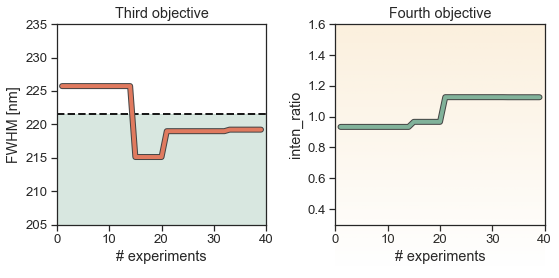

In [487]:
fig, (ax4, ax5) = plt.subplots(ncols=2, nrows=1, figsize=(8,4))

experiment_nums = range(1, len(data)+1, 1)  # for x-axis

# colors
c4 = '#e07a5f'
c5 = '#81b29a'

# -----------
# plot traces
# -----------
ax4.plot(experiment_nums, obj_4, color='#444444', linewidth=6)
ax4.plot(experiment_nums, obj_4, color=c1, linewidth=4)

ax5.plot(experiment_nums, obj_5, color='#444444', linewidth=6)
ax5.plot(experiment_nums, obj_5, color=c2, linewidth=4)

# -------------------------------------
# plot target region for the objectives 
# -------------------------------------
ax4.fill_between(x=range(0, len(data)+2, 1), y1=0.0, y2=thr_fwhm, color=c2, alpha=0.3)  # simpler
#ax2.fill_between(x=experiment_nums, y1=min_fwhm_list, y2=thr_fwhm_list, color=c2, alpha=0.3)  # perhaps more accurate
#ax5.fill_between(x=range(0, len(data)+2, 1), y1=0.0, y2=50, color=c3, alpha=0.3)

gradient_patch(ax=ax5, xmin=0, xmax=40, ymin=0.0, ymax=1.6, fill_color=c3, alpha=0.3)

# titles and labels
for ax in [ax4, ax5]:
    ax.set_xlabel('# experiments')
    
ax4.set_title('Third objective')
ax5.set_title('Fourth objective')

ax4.set_ylabel('FWHM [nm]')
ax5.set_ylabel('inten_ratio')

ax4.set_xlim([0, 40])
ax5.set_xlim([0, 40])

ax4.set_ylim([205, 235])
ax5.set_ylim([0.3, 1.6])


#ax4.axhline(y=chimera.tolerances[0], linestyle='--', color='k', linewidth=2, zorder=1)
ax4.axhline(y=thres_fwhm, linestyle='--', color='k', linewidth=2, zorder=1)
#ax3.axhline(y=chimera.tolerances[2], linestyle='--', color='k', linewidth=2, zorder=1)
    
plt.tight_layout()
#fig.savefig("objectives_plot_2.pdf", bbox_inches='tight')
fig.savefig("objectives_plot_2.png", bbox_inches='tight')

## 3D plot

In [79]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data(pos, size=(1,1,1)):
    # code taken from
    # https://stackoverflow.com/a/35978146/4124317
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(pos, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

#def plotCubeAt(ax=None, pos=(0,0,0), size=(1,1,1)):
    # Plotting a cube element at position pos
   # if ax !=None:
     

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll

def multicolored_lines():
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    """

    x = np.linspace(0, 4. * np.pi, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    lc = colorline(x, y, cmap='hsv')
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(-1.0, 1.0)
    plt.show()

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

Text(0.5, 0, 'FWHM [nm]')

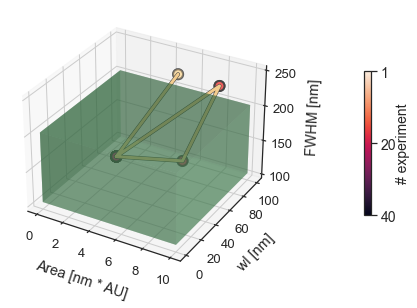

In [85]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(projection='3d')

ax.plot(obj_1, obj_3, obj_4, linewidth=4, color='#444444')
ax.plot(obj_1, obj_3, obj_4, linewidth=3, color='#f2cc8f')

cmap = plt.cm.magma_r(np.linspace(0, 1, len(obj_1)))
sc = ax.scatter(obj_1, obj_3, obj_4, s=100, c=cmap, edgecolor='#444444', linewidth=2)

#fig.colorbar(sc, shrink=0.5, pad=0.15)
# Add colorbar
fig.subplots_adjust(right=1)
cbar_ax = fig.add_axes([1.0, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
colorbar = fig.colorbar(sc, cax=cbar_ax, orientation='vertical')
_ = colorbar.set_label('# experiment', fontsize=14, labelpad=0.1)
_ = colorbar.set_ticks([0, 0.5, 1])
_ = colorbar.set_ticklabels(['40','20','1'])
_ = cbar_ax.tick_params(labelsize=14) 

# plot rectangle that shows target area
xlims = [0, 10]
ylims = [0, 100]
zlims = [min_fwhm, thr_fwhm]
centers = (np.mean(xlims), np.mean(ylims), np.mean(zlims))
len_edges = (np.max(xlims)-np.min(xlims), np.max(ylims)-np.min(ylims), np.max(zlims)-np.min(zlims))
X, Y, Z = cuboid_data(pos=centers, size=len_edges)

ax.plot_surface(X, Y, Z, color='g', alpha=0.3, linewidth=0)

# labels
ax.set_xlabel('Area [nm * AU]', labelpad=10)
ax.set_ylabel('wl [nm]', labelpad=10)
ax.set_zlabel('FWHM [nm]', labelpad=10)

#plt.tight_layout()
#fig.savefig("3d_plot.pdf", bbox_inches='tight')